# Project 1

---
## Starting code

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the API key
from API_keys import geoapify_key
from API_keys import yelp_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

## Research Question 1: General Information

In [22]:
# Prepare Chick-Fil-A data for LA and Houston from Yelp API
location = ['Los Angeles','Houston']
business = 'chick-fil-a'
num_results = 50

name = []
alias = []
ID = []
rating = []
review_count = []
area = []
lat = []
lon = []

for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        name.append(response['businesses'][i]['name'])
        alias.append(response['businesses'][i]['alias'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
        ID.append(response['businesses'][i]['id'])
        lat.append(response['businesses'][i]['coordinates']['latitude'])
        lon.append(response['businesses'][i]['coordinates']['longitude'])
        area.append(city)

print(json.dumps(response, indent=4, sort_keys=True))

{
    "businesses": [
        {
            "alias": "chick-fil-a-houston-29",
            "categories": [
                {
                    "alias": "hotdogs",
                    "title": "Fast Food"
                },
                {
                    "alias": "chickenshop",
                    "title": "Chicken Shop"
                },
                {
                    "alias": "salad",
                    "title": "Salad"
                }
            ],
            "coordinates": {
                "latitude": 29.7867913,
                "longitude": -95.4675463
            },
            "display_phone": "(713) 686-8542",
            "distance": 1947.5475996207933,
            "id": "5aBdBzfECMoLw0sm_cstTg",
            "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/beHhHhMFadm5kWMXYFExyQ/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "7660 Katy Fwy",
                "address2": "",
                "address3": "",


In [23]:
#Create Dataframe
'''df_yelp = pd.DataFrame({"name": name,
                        "Alias": alias,
                        "ID": ID,
                        "Rating": rating,
                        "review_count": review_count,
                       "Area":area})'''
df_yelp = pd.DataFrame({"name": name,
                        "Alias": alias,
                        "ID": ID,
                        "Rating": rating,
                        "review_count": review_count,
                       "Area":area,
                       "Lat":lat,
                       "Lon":lon})
df_yelp

,name,Alias,ID,Rating,review_count,Area,Lat,Lon
0,Chick-fil-A,chick-fil-a-los-angeles-28,5JuGBCftbVW8qL6B_nCpLA,3.0,158,Los Angeles,34.089068,-118.309515
1,Chick-fil-A,chick-fil-a-los-angeles-14,9da1jwrQKNdt3zJGO_7AXw,3.5,921,Los Angeles,34.097757,-118.338254
2,Chick-fil-A,chick-fil-a-los-angeles-24,O-uYhHRebCCAYLlMKCZU7w,2.5,205,Los Angeles,34.037474,-118.377092
3,Chick-fil-A,chick-fil-a-los-angeles-23,903X7MzJqEW6vKkEF6IDLw,3.0,287,Los Angeles,34.049415,-118.259353
4,Chick-fil-A,chick-fil-a-los-angeles,Fs7lKMANuifCyDjF99opRA,3.5,533,Los Angeles,34.016639,-118.282575
...,...,...,...,...,...,...,...,...
95,Chick-fil-A,chick-fil-a-houston-10,zxJhuUzPXcwDlBIuli3mOQ,3.0,98,Houston,29.901682,-95.633868
96,Chick-fil-A,chick-fil-a-houston-44,hlV-yKQVQDm_WvGKRk6tQQ,3.0,94,Houston,29.967847,-95.533781
97,Chick-fil-A,chick-fil-a-houston-96,r10ug2qRorxlu39m9jfbsg,3.0,107,Houston,29.784321,-95.706519
98,Chick-fil-A,chick-fil-a-houston-77,_28qUFlhLyZmu-HSyxWWwQ,3.5,51,Houston,29.995654,-95.483175


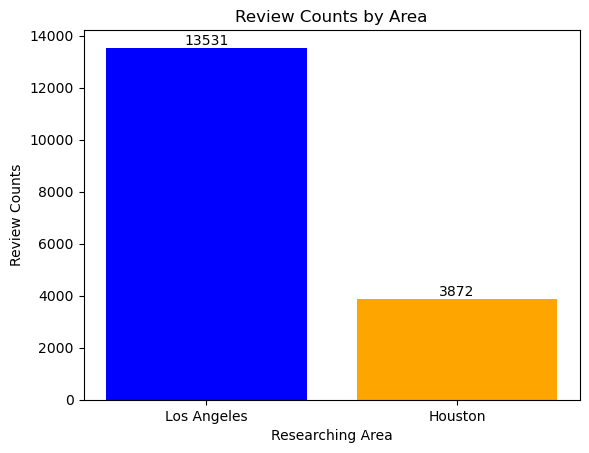

In [24]:
# Calculate total review counts for each area
Total1 = df_yelp.loc[df_yelp['Area'] == location[0]]['review_count'].sum()
Total2 = df_yelp.loc[df_yelp['Area'] == location[1]]['review_count'].sum()

# Create a bar plot
locations = range(len(location))
review_counts = [Total1, Total2]

fig, ax = plt.subplots()

bars = ax.bar(locations, review_counts, color=['blue', 'orange'])
ax.set_title("Review Counts by Area")
ax.set_xlabel("Researching Area")
ax.set_ylabel("Review Counts")

# Set x-axis tick positions and labels
ax.set_xticks(locations)
ax.set_xticklabels(location)

# Add numbers on top of the bars
for bar, count in zip(bars, review_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig("Output/1_Geographical_Analysis_reviewcount.png")

# Show the plot
plt.show()

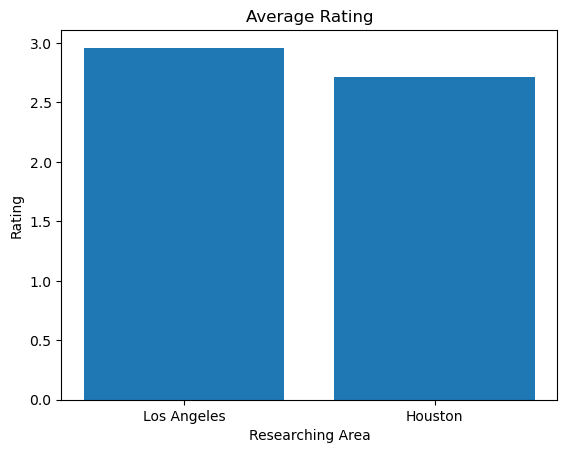

In [25]:
# plot average rating for both area

Avg1 =df_yelp.loc[df_yelp['Area']==location[0]]['Rating'].mean()
Avg2 =df_yelp.loc[df_yelp['Area']==location[1]]['Rating'].mean()
avg = [Avg1, Avg2]
plt.bar(location,avg)
plt.title("Average Rating")
plt.xlabel("Researching Area")
plt.ylabel("Rating")
# output the file as picture
plt.savefig("Output/1_Geographical_Analysis_ratingAvg.png")
plt.show()

In [26]:
# Create a scaling factor
scaling_factor = 50

# Create a new column for scaled review sizes
df_yelp['Scaled_Ratings'] = df_yelp['Rating'] * scaling_factor

# Function to determine color based on rating
def determine_color(rating):
    if rating < 3:
        return 'Less than 3'   # Color for ratings less than 3
    elif rating < 4:
        return 'Less than 4'   # Color for ratings less than 4
    else:
        return '4 and above'    # Color for ratings 4 and above

# Apply the color
df_yelp['Color'] = df_yelp['Rating'].apply(determine_color)

#Define a color map for the categories
color_map = {
    'Less than 4': 'yellow',
    'Less than 3': 'red',
    '4 and above': 'green'}

#Plot LA
map_plot_1 = df_yelp.loc[df_yelp['Area']==location[0]].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size= 'Scaled_Ratings',
    cmap=color_map,
    color='Color' 
)
  
# Display the map plot 1
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Color,Scaled_Ratings)

In [27]:
#Create a scaling factor
scaling_factor = 50

#Create a new column for scaled review sizes
df_yelp['Scaled_Ratings2'] = df_yelp['Rating'] * scaling_factor
        
#Determine color based on rating
def determine_color(rating):
    if rating < 3:
        return 'Less than 3'   #Category for ratings less than 3
    elif rating < 4:
        return 'Less than 4'   #Category for ratings less than 4
    else:
        return '4 and above'   #Category for ratings 4 and above

# Apply the color
df_yelp['Color'] = df_yelp['Rating'].apply(determine_color)

#Define a color map for the categories
color_map = {
    'Less than 3': 'red',
    'Less than 4': 'yellow',
    '4 and above': 'green'}

#Define PLot 2
map_plot_2 = df_yelp.loc[df_yelp['Area']==location[1]].hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size= 'Scaled_Ratings2',
    cmap=color_map,
    color='Color'
)
# Display the map plot 2
map_plot_2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Color,Scaled_Ratings2)

## Research Question 2: History vs. Recent

In [ ]:
# Generate dataframe with API

business_ID = 'chick-fil-a-los-angeles-28'

headers = {
    'accept': 'application/json',
    'Authorization': f'Bearer {yelp_key}'
}
    
url = f"https://api.yelp.com/v3/businesses/{business_ID}/reviews?limit=10&sort_by=newest"

response2 = requests.get(url, headers=headers).json()

In [ ]:
# prepare average recent rating

recent_average_rating = []

for i in df_yelp["ID"]:
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    
    url = f"https://api.yelp.com/v3/businesses/{i}/reviews?limit=10&sort_by=newest"
    
    response2 = requests.get(url, headers=headers).json()
    
    temp = []
    
    for j in range(len(response2['reviews'])):
        
        temp.append(response2['reviews'][j]['rating'])
        
    recent_average_rating.append(sum(temp)/len(temp))

In [ ]:
# adding recent rating to the dataframe
df_yelp["Recent Rating"] = recent_average_rating

df = df_yelp.loc[df_yelp['Area']==location[0]].sort_values("Rating")

In [ ]:
# prepare plotting data for LA and Houston
df_LA = df_yelp.loc[df_yelp['Area']==location[0]].sort_values("Rating")
df_Houston = df_yelp.loc[df_yelp['Area']==location[1]].sort_values("Rating")

Rating1 =df_LA['Rating'].head(5)
Rating2 =df_Houston['Rating'].head(5)
Recent1 =df_LA['Recent Rating'].head(5)
Recent2 =df_Houston['Recent Rating'].head(5)
Alias1 =df_LA['Alias'].head(5)
Alias2 =df_Houston['Alias'].head(5)

Rating3 =df_LA['Rating'].tail(5)
Rating4 =df_Houston['Rating'].tail(5)
Recent3 =df_LA['Recent Rating'].tail(5)
Recent4 =df_Houston['Recent Rating'].tail(5)
Alias3 =df_LA['Alias'].tail(5)
Alias4 =df_Houston['Alias'].tail(5)

In [ ]:
# plot historical and rencet rating for LA
fig, ax = plt.subplots(2,1, figsize=(8,12))
ax[0].bar(ind,Rating1,width,label = "average history rating")
ax[0].bar(ind+0.3,Recent1,width,label = "average recent rating")
ax[0].set_xticks(ind, Alias1,rotation = 45)
ax[0].set_ylabel("Rating")
ax[0].set_ylim(0,5)
ax[0].set_title("Los Angeles Chick-Fil-A (Bottom 5) \n History Rating vs. Recent Rating")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.9, 1.16))

plt.subplots_adjust(hspace=0.7)

ax[1].bar(ind,Rating3,width,label = "average history rating")
ax[1].bar(ind+0.3,Recent3,width,label = "average recent rating")
ax[1].set_xticks(ind, Alias3,rotation = 45)
ax[1].set_xlabel("Restaurant Alias")
ax[1].set_ylabel("Rating")
ax[0].set_ylim(0,5)
ax[1].set_title("Los Angeles Chick-Fil-A (Top 5) \n History Rating vs. Recent Rating")
ax[1].legend(loc="upper center", bbox_to_anchor=(0.9, 1.16))
plt.savefig("Output/History-vs-Recent-1.png")

In [ ]:
# plot historical and rencet rating for Houston
fig, ax = plt.subplots(2,1, figsize=(8,12))
ax[0].bar(ind,Rating2,width,label = "average history rating")
ax[0].bar(ind+0.3,Recent2,width,label = "average recent rating")
ax[0].set_xticks(ind, Alias2,rotation = 45)
ax[0].set_ylabel("Rating")
ax[0].set_ylim(0,5)
ax[0].set_title("Houston Chick-Fil-A (Bottom 5) \n History Rating vs. Recent Rating")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.9, 1.16))

plt.subplots_adjust(hspace=0.5)

ax[1].bar(ind,Rating4,width,label = "average history rating")
ax[1].bar(ind+0.3,Recent4,width,label = "average recent rating")
ax[1].set_xticks(ind, Alias4,rotation = 45)
ax[1].set_xlabel("Restaurant Alias")
ax[1].set_ylabel("Rating")
ax[0].set_ylim(0,5)
ax[1].set_title("Houston Chick-Fil-A (Top 5) \n History Rating vs. Recent Rating")
ax[1].legend(loc="upper center", bbox_to_anchor=(0.9, 1.16))
plt.savefig("Output/History-vs-Recent-2.png")

## Research Question 3: Competition Analysis

In [ ]:
# Generate dataframe with API
# Generate Chick-fil-A DataFrame with API
# Set up parameters
location = ['Los Angeles', 'Houston']
business = ['chick-fil-a']
num_results = 50

# Create empty lists for DataFrame columns
cfa_name = []
cfa_alias = []
cfa_ID = []
cfa_rating = []
cfa_review_count = []
cfa_price = []
cfa_area = []

# Loop through API request
for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        for b in business:
            if b in response['businesses'][i]['alias']:
                cfa_name.append(response['businesses'][i]['name'])
                cfa_alias.append(response['businesses'][i]['alias'])
                cfa_rating.append(response['businesses'][i]['rating'])
                cfa_review_count.append(response['businesses'][i]['review_count'])
                cfa_ID.append(response['businesses'][i]['id'])
                cfa_area.append(city)
        
                if 'price' in response['businesses'][i]:
                    cfa_price.append(response['businesses'][i]['price'])
                else:
                    cfa_price.append(None)

                print(json.dumps(response['businesses'][i], indent=4, sort_keys=True))

In [ ]:
# Create Chick-fil-A DataFrame
cfa_df = pd.DataFrame({
    "Name": cfa_name,
    "Alias": cfa_alias,
    "ID": cfa_ID,
    "Rating": cfa_rating,
    "Review Count": cfa_review_count,
    "Area": cfa_area,
    "Price": cfa_price
})

In [ ]:
# Generate Raising Canes DataFrame with API
# Set up parameters
location = ['Los Angeles', 'Houston']
business = ['raising-cane']
num_results = 50

# Create empty lists for DataFrame columns
rc_name = []
rc_alias = []
rc_ID = []
rc_rating = []
rc_review_count = []
rc_price = []
rc_area = []

# Loop through API request
for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        for b in business:
            if b in response['businesses'][i]['alias']:
                rc_name.append(response['businesses'][i]['name'])
                rc_alias.append(response['businesses'][i]['alias'])
                rc_rating.append(response['businesses'][i]['rating'])
                rc_review_count.append(response['businesses'][i]['review_count'])
                rc_ID.append(response['businesses'][i]['id'])
                rc_area.append(city)
        
                if 'price' in response['businesses'][i]:
                    rc_price.append(response['businesses'][i]['price'])
                else:
                    rc_price.append(None)

                print(json.dumps(response['businesses'][i], indent=4, sort_keys=True))

In [ ]:
# Create Raising Canes DataFrame
rc_df = pd.DataFrame({
    "Name": rc_name,
    "Alias": rc_alias,
    "ID": rc_ID,
    "Rating": rc_rating,
    "Review Count": rc_review_count,
    "Area": rc_area,
    "Price": rc_price
})

In [ ]:
# Generate KFC DataFrame with API
# Set up parameters
location = ['Los Angeles', 'Houston']
business = 'kfc'
num_results = 50

# Create empty lists for DataFrame columns
kfc_name = []
kfc_alias = []
kfc_ID = []
kfc_rating = []
kfc_review_count = []
kfc_price = []
kfc_area = []

# Loop through API request
for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        for b in business:
            if b in response['businesses'][i]['alias']:
                kfc_name.append(response['businesses'][i]['name'])
                kfc_alias.append(response['businesses'][i]['alias'])
                kfc_rating.append(response['businesses'][i]['rating'])
                kfc_review_count.append(response['businesses'][i]['review_count'])
                kfc_ID.append(response['businesses'][i]['id'])
                kfc_area.append(city)
        
                if 'price' in response['businesses'][i]:
                    kfc_price.append(response['businesses'][i]['price'])
                else:
                    kfc_price.append(None)

                print(json.dumps(response['businesses'][i], indent=4, sort_keys=True))

In [ ]:
# Create KFC DataFrame
kfc_df = pd.DataFrame({
    "Name": kfc_name,
    "Alias": kfc_alias,
    "ID": kfc_ID,
    "Rating": kfc_rating,
    "Review Count": kfc_review_count,
    "Area": kfc_area,
    "Price": kfc_price
})

In [ ]:
# Generate Daves Hot Chicken DataFrame with API
# Set up parameters
location = ['Los Angeles', 'Houston']
business = 'daves-hot-chicken'
num_results = 50

# Create empty lists for DataFrame columns
dhc_name = []
dhc_alias = []
dhc_ID = []
dhc_rating = []
dhc_review_count = []
dhc_price = []
dhc_area = []

# Loop through API request
for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        if business in response['businesses'][i]['alias']:
            dhc_name.append(response['businesses'][i]['name'])
            dhc_alias.append(response['businesses'][i]['alias'])
            dhc_rating.append(response['businesses'][i]['rating'])
            dhc_review_count.append(response['businesses'][i]['review_count'])
            dhc_ID.append(response['businesses'][i]['id'])
            dhc_area.append(city)
        
            if 'price' in response['businesses'][i]:
                dhc_price.append(response['businesses'][i]['price'])
            else:
                dhc_price.append(None)

            print(json.dumps(response['businesses'][i], indent=4, sort_keys=True))

In [ ]:
# Create Daves Hot Chicken DataFrame
dhc_df = pd.DataFrame({
    "Name": dhc_name,
    "Alias": dhc_alias,
    "ID": dhc_ID,
    "Rating": dhc_rating,
    "Review Count": dhc_review_count,
    "Area": dhc_area,
    "Price": dhc_price
})

In [ ]:
# Assign Restaurant Type to each DataFrame
cfa_df = cfa_df.assign(restaurant_type="Chick-fil-A")
rc_df = rc_df.assign(restaurant_type="Raising Cane")
kfc_df = kfc_df.assign(restaurant_type="KFC")
dhc_df = dhc_df.assign(restaurant_type="Dave's Hot Chicken")

In [ ]:
# Concatenate all Restaurant DataFrames together 
merged_df = pd.concat([cfa_df, rc_df, kfc_df, dhc_df], ignore_index=True)
merged_df

In [ ]:
# Rename the Restaurant Type column
merged_df = merged_df.rename(columns={"restaurant_type": "Restaurant Type"})
merged_df

# Export the Restaurant Type data into a csv
merged_df.to_csv("Output/restaurants.csv", index_label="Restaurant_Types")

In [ ]:
# Group by the Area column
area_grouped = merged_df.groupby("Area")

la_group = area_grouped.get_group("Los Angeles")
houston_group = area_grouped.get_group("Houston")

In [ ]:
# Get the following columns from the group of LA Restaurants 
la_group = la_group[["Restaurant Type", "Rating", "Review Count", "Area", "Price"]]
la_group

In [ ]:
# Get the following columns from the group of HOU Restaurants 
houston_group = houston_group[["Restaurant Type", "Rating", "Review Count", "Area", "Price"]]
houston_group

In [ ]:
# Create dictionary for colors and Restaurant Types 
color_map = {"Chick-fil-A": "red", "Raising Cane": "orange", "KFC": "black", "Dave's Hot Chicken": "yellow"}

In [ ]:
# Use grouped data 
area_grouped = merged_df.groupby("Area")

# Create subplots to represent the Restaurant Types
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create handles and labels list for the legend
la_handles = []
la_labels = []

# Loop through each Restaurant Type in Los Angeles
for restaurant_type, group_df in area_grouped.get_group("Los Angeles").groupby("Restaurant Type"):
    bars = ax1.bar(restaurant_type, group_df["Rating"].mean(), color=color_map.get(restaurant_type))
    
    # Get bar graph max values for each Restaurant
    max_height = max(bar.get_height() for bar in bars)
    ax1.text(bars[0].get_x() + bars[0].get_width() / 2, max_height + 0.05,
             f"{max_height:.2f}", ha="center", va="bottom", color="black", fontsize=10)
    
    # Append handles and labels to the lists
    la_handles.append(bars[0])
    la_labels.append(restaurant_type)

# Set up bar graph comparing Ratings by Restaurant Type
ax1.set_ylabel("Average Rating")
ax1.set_title("Average Ratings by Restaurant Type in Los Angeles")

ax1.legend(la_handles, la_labels, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

plt.ylim(0, 5)

plt.tight_layout()

plt.savefig("Output/Competition1.png")

plt.show()

In [ ]:
# Use grouped data
area_grouped = merged_df.groupby("Area")

# Create subplots to represent the Restaurant Types
fig, ax2 = plt.subplots(figsize=(8, 5))

# Create handles and labels list for the legend
hou_handles = []
hou_labels = []

# Loop through each Restaurant Type in Houston
for restaurant_type, group_df in area_grouped.get_group("Houston").groupby("Restaurant Type"):
    bars = ax2.bar(restaurant_type, group_df["Rating"].mean(), color=color_map.get(restaurant_type))
    
    # Get bar graph max values for each Restaurant
    max_height = max(bar.get_height() for bar in bars)
    ax2.text(bars[0].get_x() + bars[0].get_width() / 2, max_height + 0.05,
             f"{max_height:.2f}", ha="center", va="bottom", color="black", fontsize=10)
    
    # Append handles and labels to the lists
    hou_handles.append(bars[0])
    hou_labels.append(restaurant_type)
    
# Set up bar graph comparing Ratings by Restaurant Type
ax2.set_ylabel("Average Rating")
ax2.set_title("Average Ratings by Restaurant Type in Houston")

ax2.legend(hou_handles, hou_labels, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

plt.ylim(0, 5)

plt.tight_layout()

plt.savefig("Output/Competition2.png")

plt.show()